In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import t as t_student
from scipy.stats import norm
import statsmodels.api as ss
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from  statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_excel('DOE_2k.xlsx')
df

,function,size,clusters,model,type_model,observation,objective,runtime,infactible
0,f1,15,100,1,base_model,1,7.193815e+06,74.407009,False
1,f1,15,100,1,cluster_model,1,6.232796e+06,5.172998,False
2,f1,15,149,2,base_model,1,7.193815e+06,74.834293,False
3,f1,15,149,2,cluster_model,1,7.193815e+06,18.878010,False
4,f1,20,100,3,base_model,1,9.100126e+06,320.069836,False
...,...,...,...,...,...,...,...,...,...
75,f2,15,149,6,cluster_model,5,2.726945e+06,11.704002,False
76,f2,20,100,7,base_model,5,5.091297e+06,73.045771,False
77,f2,20,100,7,cluster_model,5,8.368370e+06,4.468000,False
78,f2,20,149,8,base_model,5,5.091297e+06,73.137030,False


In [3]:
formula = 'runtime ~ C(type_model)'
modelo = ols(formula = formula, data=df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                runtime   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     33.01
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.69e-07
Time:                        15:11:23   Log-Likelihood:                -465.61
No. Observations:                  80   AIC:                             935.2
Df Residuals:                      78   BIC:                             940.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        116.1843     13.058      8.898      0.000      90.188     142.181
C(type_model)[T.cluster_model]  -106.0947     18.467     -5.745      0.000    -142.859     -69.330
==============================================================================
Omnibus:                       24.222   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.142
Skew:                           1.396   Prob(JB):                     6.36e-08
Kurtosis:                       4.465   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(type_model),1.0,225121.521000,225121.521000,33.007269,1.693714e-07
Residual,78.0,531988.223955,6820.361846,NaN,NaN


In [5]:
df.type_model.unique()

array(['base_model', 'cluster_model'], dtype=object)

In [6]:
round((df[df.type_model=='cluster_model'].runtime.mean()/df[df.type_model=='base_model'].runtime.mean())*100, 2)

8.68

## Análisis premilinar: Nos interesa saber cuáles son los factores que afectan al tiempo $2 ^ K$

In [7]:
formula = 'runtime ~ C(size) + C(function) + C(type_model) + C(size):C(function) + C(type_model):C(size) + C(type_model):C(function) + C(type_model):C(size):C(function)'
modelo = ols(formula = formula, data=df).fit()
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(size),1.0,117818.141802,117818.141802,4683.611843,2.880898e-67
C(function),1.0,109866.563267,109866.563267,4367.513602,3.428590e-66
C(type_model),1.0,225121.521000,225121.521000,8949.231465,2.804522e-77
C(size):C(function),1.0,39114.573570,39114.573570,1554.917411,1.722405e-50
C(type_model):C(size),1.0,116037.430534,116037.430534,4612.823420,4.943690e-67
C(type_model):C(function),1.0,106754.865486,106754.865486,4243.814616,9.484825e-66
C(type_model):C(size):C(function),1.0,40585.460304,40585.460304,1613.389412,4.827757e-51
Residual,72.0,1811.188991,25.155403,NaN,NaN


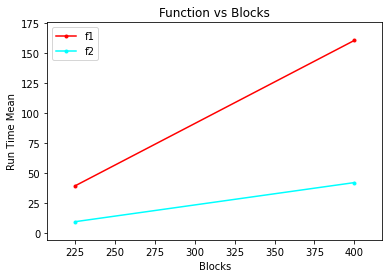

In [8]:
interaction_plot(df['size']**2, df['function'], df['runtime']);
plt.ylabel("Run Time Mean")
plt.xlabel("Blocks")
plt.title("Function vs Blocks")
plt.legend()

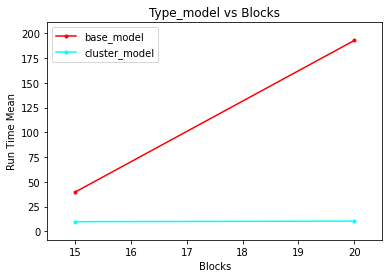

In [9]:
interaction_plot(df['size'], df['type_model'], df['runtime']);
plt.ylabel("Run Time Mean")
plt.xlabel("Blocks")
plt.title("Type_model vs Blocks")
plt.legend()

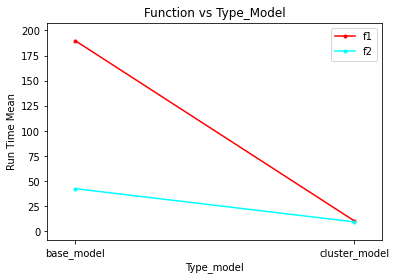

In [10]:
interaction_plot(df['type_model'], df['function'], df['runtime']);
plt.ylabel("Run Time Mean")
plt.xlabel("Type_model")
plt.title("Function vs Type_Model")
plt.legend()

### Factores que importan ($\alpha=0.05$, confianza=95%): 
* Size
* Function

In [11]:
df = pd.read_excel('DOE_PLANIFICACION_COMPLETED.xlsx')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'DOE_PLANIFICACION_COMPLETED.xlsx'

In [12]:
df = df[df.infactible==False].copy()
len(df)

80

In [13]:
formula = 'runtime ~ C(function) + C(size) + C(type_model) + C(function):C(size) + C(function):C(type_model) + C(size):C(type_model) + C(size):C(type_model):C(function)'
modelo = ols(formula=formula, data=df).fit()
anova = anova_lm(modelo)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(function),1.0,109866.563267,109866.563267,4367.513602,3.428590e-66
C(size),1.0,117818.141802,117818.141802,4683.611843,2.880898e-67
C(type_model),1.0,225121.521000,225121.521000,8949.231465,2.804522e-77
C(function):C(size),1.0,39114.573570,39114.573570,1554.917411,1.722405e-50
C(function):C(type_model),1.0,106754.865486,106754.865486,4243.814616,9.484825e-66
C(size):C(type_model),1.0,116037.430534,116037.430534,4612.823420,4.943690e-67
C(size):C(type_model):C(function),1.0,40585.460304,40585.460304,1613.389412,4.827757e-51
Residual,72.0,1811.188991,25.155403,NaN,NaN


ValueError: The lengths of the data (2) and the error 1 do not match

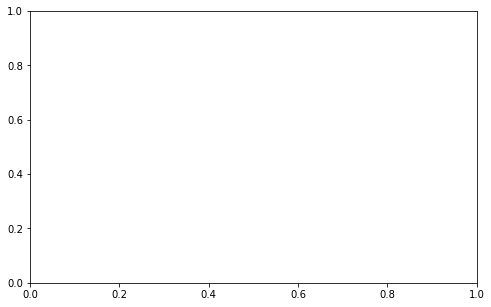

In [14]:
comp = pairwise_tukeyhsd(df['runtime'], df['size']**2)
comp.plot_simultaneous(figsize=(8,5))
plt.title('Comparison IC runtimes')
plt.ylabel('Blocks')
plt.xlabel('IC 95% runtimes')
plt.tight_layout()

In [ ]:
df_gap = pd.read_excel('DOE_PLANIFICACION_COMPLETED_GAP.xlsx')
df_gap.head(2)

In [15]:
df_gap = df_gap[(df_gap.infactible_base==False)&(df_gap.infactible_cluster==False)]

NameError: name 'df_gap' is not defined

In [16]:
comp = pairwise_tukeyhsd(df_gap['gap'], df_gap['function'])
comp.plot_simultaneous(figsize=(8,5))
plt.title('Comparison IC runtimes')
plt.ylabel('Blocks')
plt.xlabel('IC 95% gap')
plt.tight_layout()

NameError: name 'df_gap' is not defined

In [17]:
type(df_gap.gap.iloc[0])

NameError: name 'df_gap' is not defined